In [1]:
import numpy as np
import math
from sympy import *
from scipy import integrate
import matplotlib.pyplot as plt
import random
import time

In [2]:
def TDT(T):
    b = T[0]+T[2]+2*T[3]; c = T[1]+T[2]+2*T[4]
    if b+c == 0:
        return 0
    else:
        return ((b-c)**2)/(b+c)

In [3]:
def DOLS_TDT(x,n,m):
    TG = np.zeros((m,6))
    for i in range(m):
        for j in range(n):
            TG[i][int(x[j][i])] += 1
    
    #Step 1
    MCP = np.zeros((m,6)); MCN = np.zeros((m,6)) #MaxChange
    for i in range(m):
        T = TG[i]
        X = TDT(T); MCP[i] = np.zeros(6); MCN[i] = np.zeros(6)
        if T[0] >= 1:
            Y = TDT([T[0]-1, T[1]+1, T[2], T[3], T[4], T[5]])
            MCP[i][0] = max(MCP[i][0], Y-X); MCN[i][0] = max(MCN[i][0], X-Y)
            Y = TDT([T[0]-1, T[1], T[2]+1, T[3], T[4], T[5]])
            MCP[i][0] = max(MCP[i][0], Y-X); MCN[i][0] = max(MCN[i][0], X-Y)
            Y = TDT([T[0]-1, T[1], T[2], T[3]+1, T[4], T[5]])
            MCP[i][0] = max(MCP[i][0], Y-X); MCN[i][0] = max(MCN[i][0], X-Y)
            Y = TDT([T[0]-1, T[1], T[2], T[3], T[4]+1, T[5]])
            MCP[i][0] = max(MCP[i][0], Y-X); MCN[i][0] = max(MCN[i][0], X-Y)
            Y = TDT([T[0]-1, T[1], T[2], T[3], T[4], T[5]+1])
            MCP[i][0] = max(MCP[i][0], Y-X); MCN[i][0] = max(MCN[i][0], X-Y)
        if T[1] >= 1:
            Y = TDT([T[0]+1, T[1]-1, T[2], T[3], T[4], T[5]])
            MCP[i][1] = max(MCP[i][1], Y-X); MCN[i][1] = max(MCN[i][1], X-Y)
            Y = TDT([T[0], T[1]-1, T[2]+1, T[3], T[4], T[5]])
            MCP[i][1] = max(MCP[i][1], Y-X); MCN[i][1] = max(MCN[i][1], X-Y)
            Y = TDT([T[0], T[1]-1, T[2], T[3]+1, T[4], T[5]])
            MCP[i][1] = max(MCP[i][1], Y-X); MCN[i][1] = max(MCN[i][1], X-Y)
            Y = TDT([T[0], T[1]-1, T[2], T[3], T[4]+1, T[5]])
            MCP[i][1] = max(MCP[i][1], Y-X); MCN[i][1] = max(MCN[i][1], X-Y)
            Y = TDT([T[0], T[1]-1, T[2], T[3], T[4], T[5]+1])
            MCP[i][1] = max(MCP[i][1], Y-X); MCN[i][1] = max(MCN[i][1], X-Y)
        if T[2] >= 1:
            Y = TDT([T[0]+1, T[1], T[2]-1, T[3], T[4], T[5]])
            MCP[i][2] = max(MCP[i][2], Y-X); MCN[i][2] = max(MCN[i][2], X-Y)
            Y = TDT([T[0], T[1]+1, T[2]-1, T[3], T[4], T[5]])
            MCP[i][2] = max(MCP[i][2], Y-X); MCN[i][2] = max(MCN[i][2], X-Y)
            Y = TDT([T[0], T[1], T[2]-1, T[3]+1, T[4], T[5]])
            MCP[i][2] = max(MCP[i][2], Y-X); MCN[i][2] = max(MCN[i][2], X-Y)
            Y = TDT([T[0], T[1], T[2]-1, T[3], T[4]+1, T[5]])
            MCP[i][2] = max(MCP[i][2], Y-X); MCN[i][2] = max(MCN[i][2], X-Y)
            Y = TDT([T[0], T[1], T[2]-1, T[3], T[4], T[5]+1])
            MCP[i][2] = max(MCP[i][2], Y-X); MCN[i][2] = max(MCN[i][2], X-Y)
        if T[3] >= 1:
            Y = TDT([T[0]+1, T[1], T[2], T[3]-1, T[4], T[5]])
            MCP[i][3] = max(MCP[i][3], Y-X); MCN[i][3] = max(MCN[i][3], X-Y)
            Y = TDT([T[0], T[1]+1, T[2], T[3]-1, T[4], T[5]])
            MCP[i][3] = max(MCP[i][3], Y-X); MCN[i][3] = max(MCN[i][3], X-Y)
            Y = TDT([T[0], T[1], T[2]+1, T[3]-1, T[4], T[5]])
            MCP[i][3] = max(MCP[i][3], Y-X); MCN[i][3] = max(MCN[i][3], X-Y)
            Y = TDT([T[0], T[1], T[2], T[3]-1, T[4]+1, T[5]])
            MCP[i][3] = max(MCP[i][3], Y-X); MCN[i][3] = max(MCN[i][3], X-Y)
            Y = TDT([T[0], T[1], T[2], T[3]-1, T[4], T[5]+1])
            MCP[i][3] = max(MCP[i][3], Y-X); MCN[i][3] = max(MCN[i][3], X-Y)
        if T[4] >= 1:
            Y = TDT([T[0]+1, T[1], T[2], T[3], T[4]-1, T[5]])
            MCP[i][4] = max(MCP[i][4], Y-X); MCN[i][4] = max(MCN[i][4], X-Y)
            Y = TDT([T[0], T[1]+1, T[2], T[3], T[4]-1, T[5]])
            MCP[i][4] = max(MCP[i][4], Y-X); MCN[i][4] = max(MCN[i][4], X-Y)
            Y = TDT([T[0], T[1], T[2]+1, T[3], T[4]-1, T[5]])
            MCP[i][4] = max(MCP[i][4], Y-X); MCN[i][4] = max(MCN[i][4], X-Y)
            Y = TDT([T[0], T[1], T[2], T[3]+1, T[4]-1, T[5]])
            MCP[i][4] = max(MCP[i][4], Y-X); MCN[i][4] = max(MCN[i][4], X-Y)
            Y = TDT([T[0], T[1], T[2], T[3], T[4]-1, T[5]+1])
            MCP[i][4] = max(MCP[i][4], Y-X); MCN[i][4] = max(MCN[i][4], X-Y)
        if T[5] >= 1:
            Y = TDT([T[0]+1, T[1], T[2], T[3], T[4], T[5]-1])
            MCP[i][5] = max(MCP[i][5], Y-X); MCN[i][5] = max(MCN[i][5], X-Y)
            Y = TDT([T[0], T[1]+1, T[2], T[3], T[4], T[5]-1])
            MCP[i][5] = max(MCP[i][5], Y-X); MCN[i][5] = max(MCN[i][5], X-Y)
            Y = TDT([T[0], T[1], T[2]+1, T[3], T[4], T[5]-1])
            MCP[i][5] = max(MCP[i][5], Y-X); MCN[i][5] = max(MCN[i][5], X-Y)
            Y = TDT([T[0], T[1], T[2], T[3]+1, T[4], T[5]-1])
            MCP[i][5] = max(MCP[i][5], Y-X); MCN[i][5] = max(MCN[i][5], X-Y)
            Y = TDT([T[0], T[1], T[2], T[3], T[4]+1, T[5]-1])
            MCP[i][5] = max(MCP[i][5], Y-X); MCN[i][5] = max(MCN[i][5], X-Y)
    #print(MCP, MCN)
    
    #Step 2
    LSS = np.zeros(int(2**m))
    for j in range(n):
        LSJ = np.zeros((m,int(2**m)))
        LSJ[0][0] = MCP[0][int(x[j][0])]; LSJ[0][1] = MCN[0][int(x[j][0])]
        #print(LSJ[0],LSJ[1])
        for i in range(1,m):
            for k in range(2**i):
                LSJ[i][2*k+0] = LSJ[i-1][k] + MCP[i][int(x[j][i])]
                LSJ[i][2*k+1] = LSJ[i-1][k] + MCN[i][int(x[j][i])]
        #print(LSJ)
        for i in range(int(2**m)):
            LSS[i] = max(LSS[i],LSJ[m-1][i])    
        #print(LSS)
        
    #Step 3
    DOLSP = np.zeros(m) #LS^{i+}
    DOLSN = np.zeros(m) #LS^{i-}
    
    for j in range(m):
        for i in range(int(2**m)):
            if int(i/(2**(m-1-j)))%2 == 0:
                DOLSP[j] = max(DOLSP[j], LSS[i])
            else:
                DOLSN[j] = max(DOLSN[j], LSS[i])
    
    return DOLSP, DOLSN

In [4]:
def h3(z,l):
    return (3*np.sqrt(3)*(l**(2/3)))/(4*math.pi*(math.fabs(z)**3+l))

def cdf(x,h,l):
    g = lambda z: h(z,l)
    return integrate.quad(g,-oo,x)

def noise(h,l,d): # using inverse transform sampling
    r = np.random.rand()
    q = 1000; z = 10
    for i in range(-50,50):
        if math.fabs(r - cdf(i/5,h,l)[0]) > q:
            z = (i-1)/5
            break
        else:
            q = min(q, math.fabs(r - cdf(i/5,h,l)[0]))
    if d == 0:
        return math.fabs(z)
    elif d == 1:
        return -math.fabs(z)
    
def alpha(k,l,m,ei): #epsilon = ei*m
    return ((l**(1/k))*(ei*m))/(2*((k-1)**((k-1)/k)))

In [5]:
def DOSS_TDT_test_positive(n,m):
    x = np.ones((n,m))
    for j in range(m):
        for i in range(n):
            if i < 1:
                x[i][j] = 0
            else:
                x[i][j] = 3
    DOLSP, DOLSN = DOLS_TDT(x,n,m)
    #LS = max(max(DOLSP), max(DOLSN))
    #print(LS/min(DOLSP), LS/min(DOLSN))
    return DOLSP, DOLSN

def DOSS_TDT_test_negative(n,m):
    x = np.ones((n,m))
    for j in range(m):
        for i in range(n):
            if i < 1:
                x[i][j] = 0
            elif i < 2:
                x[i][j] = 2
            elif i < 3:
                x[i][j] = 3
            elif i < 4:
                x[i][j] = 4
            else:
                x[i][j] = 5
    DOLSP, DOLSN = DOLS_TDT(x,n,m)
    #LS = max(max(DOLSP), max(DOLSN))
    #print(LS/min(DOLSP), LS/min(DOLSN))
    return DOLSP, DOLSN

In [6]:
def accuracy_positive(n,m,DOLSP,DOLSN):
    acc = np.zeros((8,2))
    k = 3; l = 3
    LS = np.zeros(20)
    ei = [15+5*i for i in range(8)]
    
    for j in range(20):
        LS[j] = max(max(DOLSP[j]), max(DOLSN[j]))
        for i in range(8):
            for t in range(m):
                if random.random()<0.5:
                    z = noise(h3,l,0)
                    acc[i][0] += math.fabs((DOLSP[j][t]/alpha(k,l,m,ei[i]))*z)
                    acc[i][1] += math.fabs((LS[j]/alpha(k,l,m,ei[i]))*z)
    return acc/(m*20)

def accuracy_negative(n,m,DOLSP,DOLSN):
    acc = np.zeros((8,2))
    k = 3; l = 3
    LS = np.zeros(20)
    ei = [15+5*i for i in range(8)]
    
    for j in range(20):
        LS[j] = max(max(DOLSP[j]), max(DOLSN[j]))
        for i in range(8):
            for t in range(m):
                if random.random()<0.5:
                    z = noise(h3,l,1)
                    acc[i][0] += math.fabs((DOLSN[j][t]/alpha(k,l,m,ei[i]))*z)
                    acc[i][1] += math.fabs((LS[j]/alpha(k,l,m,ei[i]))*z)
    return acc/(m*20)

[[0.10272663 0.81631593]
 [0.06603854 0.52477452]
 [0.0378621  0.30087073]
 [0.02935046 0.23323312]
 [0.05786234 0.45980244]
 [0.05613276 0.44605835]
 [0.03668808 0.2915414 ]
 [0.02025182 0.16093085]]
[[0.0821813  0.65305274]
 [0.14748608 1.17199644]
 [0.08893191 0.70669636]
 [0.04255817 0.33818803]
 [0.03144693 0.24989263]
 [0.0104561  0.0830893 ]
 [0.03473138 0.27599253]
 [0.03962313 0.31486471]]
[[0.06603854 0.52477452]
 [0.13647966 1.08453402]
 [0.03698159 0.29387373]
 [0.01247395 0.09912408]
 [0.03396268 0.26988404]
 [0.05117987 0.40670026]
 [0.04793909 0.38094743]
 [0.03698159 0.29387373]]
[[0.08071378 0.64139109]
 [0.02751606 0.21865605]
 [0.03434004 0.27288275]
 [0.03595432 0.28571057]
 [0.08176201 0.64972084]
 [0.03852248 0.30611847]
 [0.02886129 0.2293459 ]
 [0.03389979 0.26938426]]
[[0.11006424 0.87462421]
 [0.07374304 0.58599822]
 [0.07132163 0.56675649]
 [0.10419415 0.82797758]
 [0.02264179 0.17992269]
 [0.04512634 0.35859593]
 [0.01761028 0.13993987]
 [0.01496874 0.118948

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


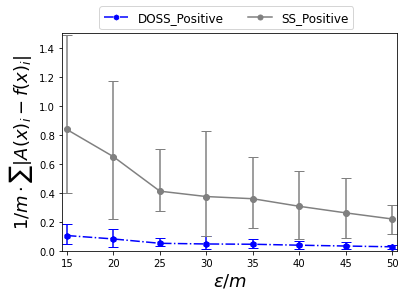

In [7]:
n = 150; m = 1

acc = np.zeros((8,2))
max_acc = np.zeros((8,2)); min_acc = np.ones((8,2))
sum_acc = np.zeros((8,2))

DOLSP = np.zeros((20,m)); DOLSN = np.zeros((20,m))
for i in range(20):
    DOLSP[i], DOLSN[i] = DOSS_TDT_test_positive(n,m)

jj = 10
for j in range(jj):
    acc = accuracy_positive(n,m,DOLSP,DOLSN)
    for i in range(8):
        for k in range(2):
            max_acc[i][k] = max(max_acc[i][k], acc[i][k])
            min_acc[i][k] = min(min_acc[i][k], acc[i][k])
            sum_acc[i][k] += acc[i][k]
    print(acc)
acc = sum_acc/jj

y_err = np.zeros((2,8,2))
for k in range(2):
    y_err[0,:,k] = acc[:,k] - min_acc[:,k]
    y_err[1,:,k] = max_acc[:,k] - acc[:,k]

ei = [15+5*i for i in range(8)]

print(acc)
fig = plt.figure()
plt.ylim(0, max(max_acc[i][j] for i in range(6) for j in range(2))+0.01)
plt.xlim(14.5, 50.5)
plt.errorbar(ei, acc[:,0], yerr = y_err[:,:,0], capsize=5, fmt='h', ecolor='blue', markeredgecolor = "blue", color='blue')
plt.plot(ei, acc[:,0], marker="h", markersize=5, color = "blue", linestyle = "dashdot", label = "DOSS_Positive")
plt.errorbar(ei, acc[:,1], yerr = y_err[:,:,1], capsize=5, fmt='o', ecolor='gray', markeredgecolor = "gray", color='gray')
plt.plot(ei, acc[:,1], marker="o", markersize=5, color = "gray", linestyle = "-", label = "SS_Positive")
plt.legend(bbox_to_anchor=(0.49, 1.02), loc='lower center', borderaxespad=0, ncol=2, fontsize=12)
plt.xlabel("$\epsilon/m$", fontsize = 18)
plt.ylabel("$1/m \cdot \sum |A(x)_i - f(x)_i|$", fontsize = 18)
fig.savefig("Accuracy_TDT_positive_m=1.png")
fig.savefig("figs/Accuracy_TDT_positive_m=1.eps", bbox_inches="tight", pad_inches=0.05)

[[0.01844886 0.44277272]
 [0.01210707 0.2905696 ]
 [0.00415099 0.09962386]
 [0.00597492 0.14339798]
 [0.00610969 0.14663252]
 [0.00982716 0.23585195]
 [0.00419292 0.10063016]
 [0.0020755  0.04981193]]
[[0.02159356 0.51824534]
 [0.01918262 0.460383  ]
 [0.00465415 0.11169948]
 [0.01341736 0.32201652]
 [0.00287515 0.06900354]
 [0.00550321 0.13207709]
 [0.0039134  0.09392149]
 [0.00572334 0.13736017]]
[[0.00524115 0.1257877 ]
 [0.00676109 0.16226614]
 [0.00264154 0.063397  ]
 [0.00922443 0.22138636]
 [0.00494166 0.11859984]
 [0.00683971 0.16415295]
 [0.00810632 0.19455165]
 [0.00345916 0.08301989]]
[[0.02704436 0.64906456]
 [0.01147813 0.27547507]
 [0.00842778 0.20226663]
 [0.00660385 0.15849251]
 [0.00853559 0.20485426]
 [0.00683971 0.16415295]
 [0.00258564 0.06205527]
 [0.0030818  0.07396317]]
[[0.00775691 0.1861658 ]
 [0.00896237 0.21509698]
 [0.00792463 0.19019101]
 [0.00754726 0.18113429]
 [0.00404318 0.09703623]
 [0.00424534 0.10188804]
 [0.00824608 0.19790599]
 [0.0051573  0.123775

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[[0.00775691 0.1861658 ]
 [0.01273601 0.30566412]
 [0.01132089 0.27170144]
 [0.00587009 0.14088223]
 [0.00619954 0.14878889]
 [0.0040881  0.09811441]
 [0.00524115 0.1257877 ]
 [0.00345916 0.08301989]]
[[0.01324964 0.31799132]
 [0.01011019 0.24264448]
 [0.00733342 0.17600216]
 [0.00709652 0.17031655]
 [0.00581319 0.13951653]
 [0.00544032 0.13056764]
 [0.00461222 0.11069318]
 [0.00417615 0.10022764]]


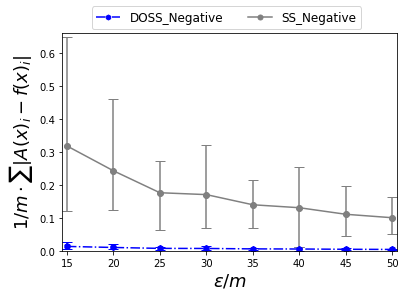

In [8]:
n = 150; m = 1

acc = np.zeros((8,2))
max_acc = np.zeros((8,2)); min_acc = np.ones((8,2))
sum_acc = np.zeros((8,2))

DOLSP = np.zeros((20,m)); DOLSN = np.zeros((20,m))
for i in range(20):
    DOLSP[i], DOLSN[i] = DOSS_TDT_test_negative(n,m)

jj = 10
for j in range(jj):
    acc = accuracy_negative(n,m,DOLSP,DOLSN)
    for i in range(8):
        for k in range(2):
            max_acc[i][k] = max(max_acc[i][k], acc[i][k])
            min_acc[i][k] = min(min_acc[i][k], acc[i][k])
            sum_acc[i][k] += acc[i][k]
    print(acc)
acc = sum_acc/jj

y_err = np.zeros((2,8,2))
for k in range(2):
    y_err[0,:,k] = acc[:,k] - min_acc[:,k]
    y_err[1,:,k] = max_acc[:,k] - acc[:,k]

ei = [15+5*i for i in range(8)]

print(acc)
fig = plt.figure()
plt.ylim(0, max(max_acc[i][j] for i in range(6) for j in range(2))+0.01)
plt.xlim(14.5, 50.5)
plt.errorbar(ei, acc[:,0], yerr = y_err[:,:,0], capsize=5, fmt='h', ecolor='blue', markeredgecolor = "blue", color='blue')
plt.plot(ei, acc[:,0], marker="h", markersize=5, color = "blue", linestyle = "dashdot", label = "DOSS_Negative")
plt.errorbar(ei, acc[:,1], yerr = y_err[:,:,1], capsize=5, fmt='o', ecolor='gray', markeredgecolor = "gray", color='gray')
plt.plot(ei, acc[:,1], marker="o", markersize=5, color = "gray", linestyle = "-", label = "SS_Negative")
plt.legend(bbox_to_anchor=(0.49, 1.02), loc='lower center', borderaxespad=0, ncol=2, fontsize=12)
plt.xlabel("$\epsilon/m$", fontsize = 18)
plt.ylabel("$1/m \cdot \sum |A(x)_i - f(x)_i|$", fontsize = 18)
fig.savefig("Accuracy_TDT_negative_m=1.png")
fig.savefig("figs/Accuracy_TDT_negative_m=1.eps", bbox_inches="tight", pad_inches=0.05)